## Importing Dataset and Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set global styles for plots
sns.set_style(style='white')
sns.set_context(context='notebook', font_scale=1.3, rc={'figure.figsize': (16,9)})

df1=pd.read_csv("/content/drive/My Drive/train.csv")
df2=pd.read_csv("/content/drive/My Drive/test.csv")

df2.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Hotel Name,reviews.text,reviews.rating,hotel Url
0,Jacob's Pickles,It has been months since I have had Jacob's Pi...,5,https://www.yelp.com/biz/jacobs-pickles-new-yo...
1,Jacob's Pickles,I don't think I even have the words. This plac...,5,https://www.yelp.com/biz/jacobs-pickles-new-yo...
2,Jacob's Pickles,This place is very good; it's just a little he...,5,https://www.yelp.com/biz/jacobs-pickles-new-yo...
3,Jacob's Pickles,Customer service : super friendly. If they had...,5,https://www.yelp.com/biz/jacobs-pickles-new-yo...
4,Jacob's Pickles,Ordered brunch delivery during COVID pandemic ...,4,https://www.yelp.com/biz/jacobs-pickles-new-yo...


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


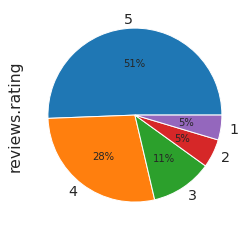

In [3]:
df2["reviews.rating"].value_counts().plot(kind='pie', autopct='%1.0f%%')


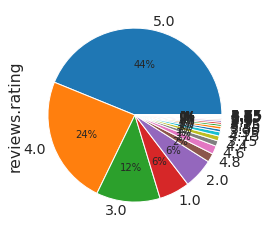

In [4]:
df1["reviews.rating"].value_counts().plot(kind='pie', autopct='%1.0f%%')

## Removing the Unused Colums

In [5]:
df1=df1.drop(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'country', 'keys', 'latitude', 'longitude',
       'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateSeen',
       'reviews.sourceURLs', 'reviews.title','reviews.userCity', 'reviews.userProvince', 'reviews.username',
       'sourceURLs', 'websites'], axis=1)
df1


,reviews.rating,reviews.text
0,5.0,Our experience at Rancho Valencia was absolute...
1,5.0,Amazing place. Everyone was extremely warm and...
2,5.0,We booked a 3 night stay at Rancho Valencia to...
3,2.0,Currently in bed writing this for the past hr ...
4,5.0,I live in Md and the Aloft is my Home away fro...
...,...,...
9995,3.0,It is hard for me to review an oceanfront hote...
9996,4.0,"I live close by, and needed to stay somewhere ..."
9997,4.0,Rolled in 11:30 laid out heads down woke up to...
9998,1.0,Absolutely terrible..I was told I was being gi...


In [6]:
df2=df2.drop(['Hotel Name','hotel Url'], axis=1)
df2

,reviews.text,reviews.rating
0,It has been months since I have had Jacob's Pi...,5
1,I don't think I even have the words. This plac...,5
2,This place is very good; it's just a little he...,5
3,Customer service : super friendly. If they had...,5
4,Ordered brunch delivery during COVID pandemic ...,4
...,...,...
5190,Love the atmosphere and the food is to die for...,5
5191,This is easily the best soul food out there (p...,5
5192,I'm so amazed about the service here Elliott a...,5
5193,The food was outstanding. As a real southern g...,5


## Adding Both DataFrames

In [7]:
df = pd.concat([df1, df2],ignore_index=True)
df


,reviews.rating,reviews.text
0,5.0,Our experience at Rancho Valencia was absolute...
1,5.0,Amazing place. Everyone was extremely warm and...
2,5.0,We booked a 3 night stay at Rancho Valencia to...
3,2.0,Currently in bed writing this for the past hr ...
4,5.0,I live in Md and the Aloft is my Home away fro...
...,...,...
15190,5.0,Love the atmosphere and the food is to die for...
15191,5.0,This is easily the best soul food out there (p...
15192,5.0,I'm so amazed about the service here Elliott a...
15193,5.0,The food was outstanding. As a real southern g...


## Filling Null Colums

In [8]:
df=df.fillna(" no review")


## Creating Label Column in DataFrame

In [9]:
a=[]
for i in df["reviews.rating"]:
    if i <= 3:
        a.append(-1)
    else:
        a.append(1)
df["label"]=a
df

,reviews.rating,reviews.text,label
0,5.0,Our experience at Rancho Valencia was absolute...,1
1,5.0,Amazing place. Everyone was extremely warm and...,1
2,5.0,We booked a 3 night stay at Rancho Valencia to...,1
3,2.0,Currently in bed writing this for the past hr ...,-1
4,5.0,I live in Md and the Aloft is my Home away fro...,1
...,...,...,...
15190,5.0,Love the atmosphere and the food is to die for...,1
15191,5.0,This is easily the best soul food out there (p...,1
15192,5.0,I'm so amazed about the service here Elliott a...,1
15193,5.0,The food was outstanding. As a real southern g...,1


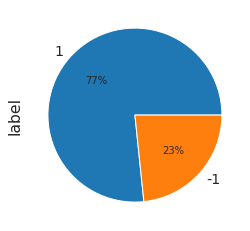

In [10]:
df["label"].value_counts().plot(kind='pie', autopct='%1.0f%%')

## Cleaning Data

In [11]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    return text

df["reviews.text"]=df['reviews.text'].apply(preprocessor)

## Count vectorization and tf-idf

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

def tokenizer(text):
    return text.split()


def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

vectorizer=CountVectorizer(stop_words=stopwords.words('english'), tokenizer=tokenizer_porter)
X=vectorizer.fit_transform(df["reviews.text"].values)
np.set_printoptions(precision=2)


tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
X=tfidf.fit_transform(X).toarray()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', "it'", 'onc', 'onli', 'ourselv', "she'", "should'v", 'themselv', 'thi', 'veri', 'wa', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [14]:
y=df["label"].values

## Spliting testing and training datasets 

In [15]:
x_train=X[0:10000]
x_test=X[10000:]
y_train=df["label"].values[0:10000]
y_test=df["label"].values[10000:]

## Creating Training  Models

In [16]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
from sklearn import svm
SVM = svm.LinearSVC()
SVM.fit(x_train, y_train)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [18]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train, y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Checking Results

In [19]:
pred=LR.predict(x_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test, pred))

[[ 328  781]
 [  83 4003]]
              precision    recall  f1-score   support

          -1       0.80      0.30      0.43      1109
           1       0.84      0.98      0.90      4086

    accuracy                           0.83      5195
   macro avg       0.82      0.64      0.67      5195
weighted avg       0.83      0.83      0.80      5195

0.8336862367661213


In [21]:
pred=SVM.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test, pred))

[[ 478  631]
 [ 246 3840]]
              precision    recall  f1-score   support

          -1       0.66      0.43      0.52      1109
           1       0.86      0.94      0.90      4086

    accuracy                           0.83      5195
   macro avg       0.76      0.69      0.71      5195
weighted avg       0.82      0.83      0.82      5195

0.8311838306063523


In [22]:
pred=nb.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test, pred))

[[  40 1069]
 [  15 4071]]
              precision    recall  f1-score   support

          -1       0.73      0.04      0.07      1109
           1       0.79      1.00      0.88      4086

    accuracy                           0.79      5195
   macro avg       0.76      0.52      0.48      5195
weighted avg       0.78      0.79      0.71      5195

0.7913378248315688


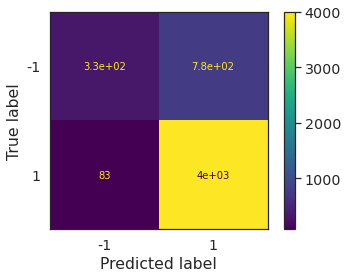

In [23]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LR, x_test, y_test) 
plt.show()


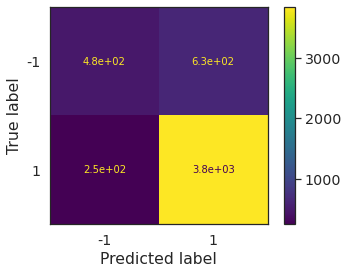

In [24]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(SVM, x_test, y_test) 
plt.show()

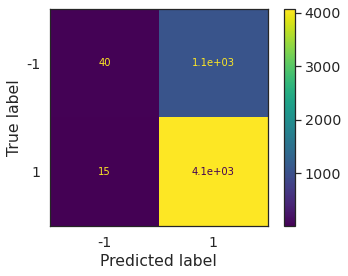

In [25]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb, x_test, y_test) 
plt.show()